## hW3 P1

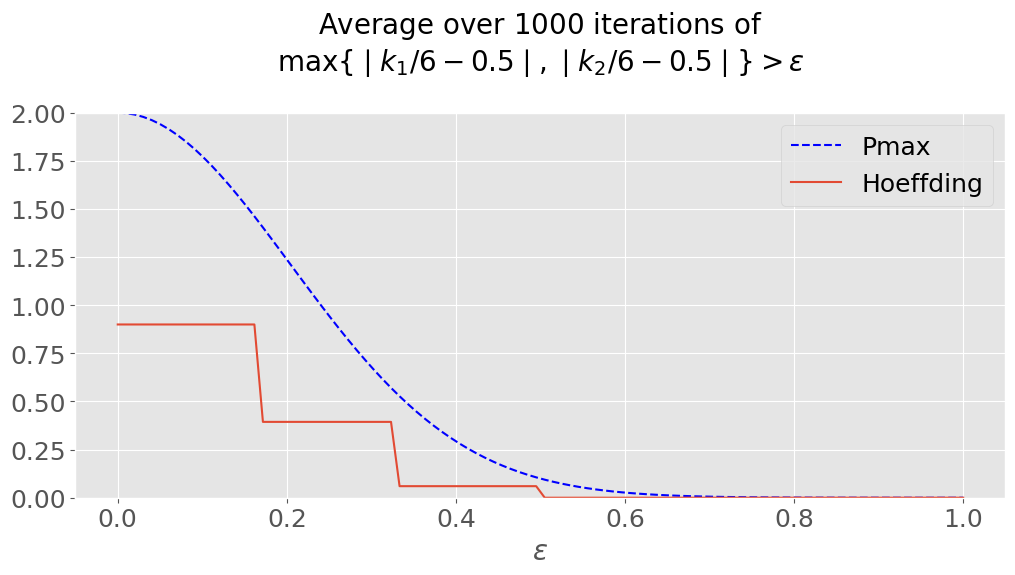

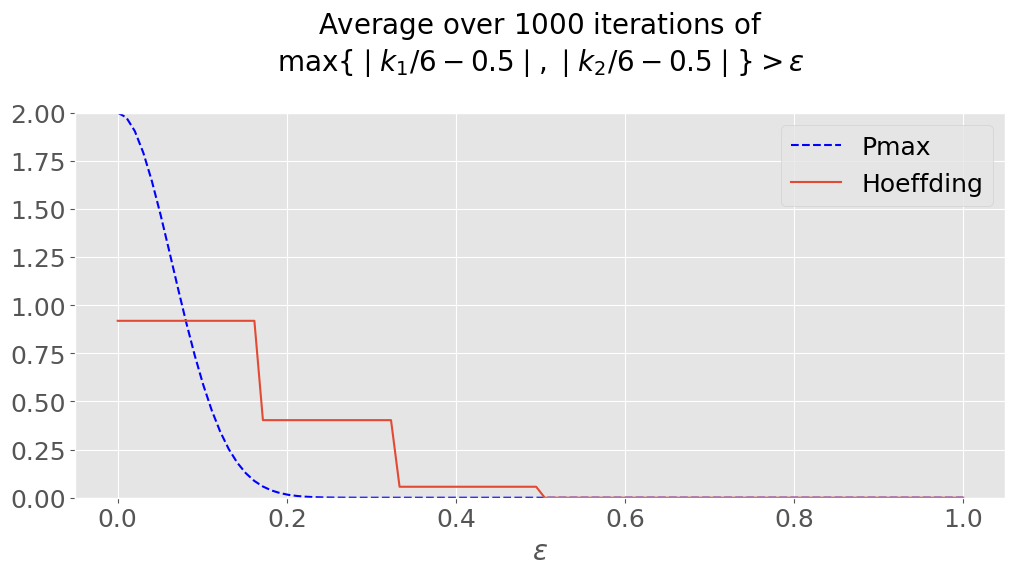

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

def hoeffding_bound(ε, N, M=1):
    return 2*M*np.exp(-2*N*ε**2)

def P(N, M, ε_space, μ):
    k = np.random.binomial(n=N,p=μ,size=(1_000, M))
    P = np.abs(k/N - μ).max(axis=1)
    return [(P > ε).mean() for ε in ε_space]

N_feature=[6,60]
for N in N_feature:
    M = 2
    μ = 0.5
    ε_space = np.linspace(0, 1, 100)
    plt.figure(figsize=(12,5))
    plt.plot(ε_space, hoeffding_bound(ε_space, N), 'b--',ε_space, 
             P(6, 2, ε_space, μ),);
    plt.title('Average over $1000$ iterations of\n'
            '$\max \{ \mid k_1/6 - 0.5 \mid,'
          '\mid k_2/6 - 0.5 \mid\} > \epsilon $\n',
          fontsize=20)
    plt.legend(['Pmax','Hoeffding'], fontsize=18)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylim(0, 2)
    plt.xlabel('$\epsilon$', fontsize=20);


## hw3 p2

In [45]:
import numpy as np
from random import sample

In [49]:
 #generating input space of 1 and -1, with P[x=-1]=u
def generate_samples(input_space_size,u):
    num_neg=int(input_space_size*u)
    num_pos=input_space_size-num_neg
    input_space=[1]*num_pos
    for i in range(num_neg):
        input_space.append(-1)
    return input_space

In [48]:
#function for drawing samples from input space
def draw_samples(input_space,size):
    dataset=sample(input_space,size)
    return dataset

In [50]:
#function to calculate error rate in dataset
def error_rate(data):
    count_neg=0
    for i in data:
        if i==-1:
            count_neg=count_neg+1
    error=count_neg/len(data)
    return error

In [68]:
input_space1=generate_samples(1000000,0.3)

In [69]:
dataset_10=draw_samples(input_space1,10)

In [70]:
error_rate_10=error_rate(dataset_10)
print("E(h)_10 = {}".format(error_rate_10))

E(h)_10 = 0.4


In [27]:
def experiment(u,n):
    input_space=generate_samples(1000000,u)
    error_rate_100times=[]
    for i in range(100):
        data_sample=draw_samples(input_space,n)
        error=error_rate(data_sample)
        error_rate_100times.append(error)
    print(" ")
    print("Q2_b_i : N={}, u={}".format(n,u))
    print(" ")
    print("Max E_d_{}(h) = {}".format(n,max(error_rate_100times)))
    print(" ")
    print("Min E_d_{}(h) = {}".format(n,min(error_rate_100times)))
    print(" ")
    print("Sample Mean E_d_{}(h) = {}".format(n,sum(error_rate_100times)
                                              /len(error_rate_100times)))
    print(" ")
    print("Sample Standard Deviation E_d_{}(h) = {}"
          .format(n,np.std(error_rate_100times)))
    print(" ")
    count_err_less=0
    for err in error_rate_100times:
        if err!=u:
            count_err_less=count_err_less+1
    print("Q2_b_ii : N={}, u={}".format(n,u))
    print(" ")
    print("# of runs with error rate different than {} ={}"
          .format(u,count_err_less))
    print("")
    print("Q2_b_iii : N={}, u={}".format(n,u))
    print(" ")
    count_diff=0
    for err in error_rate_100times:
        if abs(err-u)<0.05:
            count_diff=count_diff+1
    print("P[|E_d_{}(h)-{}|<0.05] = {}".format(n,u,count_diff/100))
    count_learn=0
    if u==0.5:
        for err in error_rate_100times:
            if err<=0.45:
                count_learn=count_learn+1
        print("# of test datasets with error<=0.45 = {}".format(count_learn))
        print(" ")

## Q2:b

In [91]:
experiment(0.3,10)

 
Q2_b_i : N=10, u=0.3
 
Max E_d_10(h) = 0.6
 
Min E_d_10(h) = 0.0
 
Sample Mean E_d_10(h) = 0.298
 
Sample Standard Deviation E_d_10(h) = 0.1303687079018581
 
Q2_b_ii : N=10, u=0.3
 
# of runs with error rate different than 0.3 =70

Q2_b_iii : N=10, u=0.3
 
P[|E_d_10(h)-0.3|<0.05] = 0.3


## Q2:c(i)

In [94]:
experiment(0.1,10)

 
Q2_b_i : N=10, u=0.1
 
Max E_d_10(h) = 0.4
 
Min E_d_10(h) = 0.0
 
Sample Mean E_d_10(h) = 0.10299999999999988
 
Sample Standard Deviation E_d_10(h) = 0.09105492847726585
 
Q2_b_ii : N=10, u=0.1
 
# of runs with error rate different than 0.1 =54

Q2_b_iii : N=10, u=0.1
 
P[|E_d_10(h)-0.1|<0.05] = 0.46


In [95]:
experiment(0.1,100)

 
Q2_b_i : N=100, u=0.1
 
Max E_d_100(h) = 0.2
 
Min E_d_100(h) = 0.03
 
Sample Mean E_d_100(h) = 0.10029999999999997
 
Sample Standard Deviation E_d_100(h) = 0.031095176474816796
 
Q2_b_ii : N=100, u=0.1
 
# of runs with error rate different than 0.1 =87

Q2_b_iii : N=100, u=0.1
 
P[|E_d_100(h)-0.1|<0.05] = 0.91


## Q2:c(ii)

In [97]:
experiment(0.3,10)

 
Q2_b_i : N=10, u=0.3
 
Max E_d_10(h) = 0.8
 
Min E_d_10(h) = 0.0
 
Sample Mean E_d_10(h) = 0.33000000000000007
 
Sample Standard Deviation E_d_10(h) = 0.14317821063276354
 
Q2_b_ii : N=10, u=0.3
 
# of runs with error rate different than 0.3 =66

Q2_b_iii : N=10, u=0.3
 
P[|E_d_10(h)-0.3|<0.05] = 0.34


In [96]:
experiment(0.3,100)

 
Q2_b_i : N=100, u=0.3
 
Max E_d_100(h) = 0.41
 
Min E_d_100(h) = 0.2
 
Sample Mean E_d_100(h) = 0.29580000000000006
 
Sample Standard Deviation E_d_100(h) = 0.045742321760050615
 
Q2_b_ii : N=100, u=0.3
 
# of runs with error rate different than 0.3 =90

Q2_b_iii : N=100, u=0.3
 
P[|E_d_100(h)-0.3|<0.05] = 0.73


## Q2:c(iii)

In [92]:
experiment(0.5,10)

 
Q2_b_i : N=10, u=0.5
 
Max E_d_10(h) = 0.9
 
Min E_d_10(h) = 0.2
 
Sample Mean E_d_10(h) = 0.539
 
Sample Standard Deviation E_d_10(h) = 0.14757709849431244
 
Q2_b_ii : N=10, u=0.5
 
# of runs with error rate different than 0.5 =71

Q2_b_iii : N=10, u=0.5
 
P[|E_d_10(h)-0.5|<0.05] = 0.29
# of test datasets with error<=0.45 = 25
 


In [93]:
experiment(0.5,100)

 
Q2_b_i : N=100, u=0.5
 
Max E_d_100(h) = 0.61
 
Min E_d_100(h) = 0.38
 
Sample Mean E_d_100(h) = 0.49759999999999993
 
Sample Standard Deviation E_d_100(h) = 0.049842150836415564
 
Q2_b_ii : N=100, u=0.5
 
# of runs with error rate different than 0.5 =94

Q2_b_iii : N=100, u=0.5
 
P[|E_d_100(h)-0.5|<0.05] = 0.66
# of test datasets with error<=0.45 = 20
 


## p4

In [24]:
import numpy as np
epsilon = 0.1

N = 1500
# test bound
print('train bound: ', np.sqrt(np.log(2/epsilon)/2/N))

# train bound
N = 500
print('train bound: ', np.sqrt(np.log(2/epsilon)/2/N))

train bound:  0.031600275703195964
train bound:  0.054733283051119734


## p5

## 5.b,c

In [26]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import math
from matplotlib.font_manager import FontProperties
import random


def sample(lb, ub, sz):
    # sample randomly from a uniform distribution 
    return lb + np.random.random_sample((sz,))*(ub-lb)


def gd_funcb(x, x1, x2):
    f_x1 = np.exp(3*x1)/(1 + np.exp(3*x1))
    f_x2 = np.exp(3*x2)/(1 + np.exp(3*x2))
    a=(f_x2-f_x1)/(x2-x1)
    b=(x2*f_x1-x1*f_x2)/(x2-x1)
    return a*x + b

def avg_g(x, gdfunc, num_samples, targetfunc):
    #compute the average hypothesis \bar{g} at given point x
    bias_at_x = 0
    gd_funcs = []
    for i in range(num_samples):
        #generate 2 sample data each time
        x1, x2 = sample(-1, 1, 2)
        v = gdfunc(x, x1, x2)
        gd_funcs.append(v)   
    average_gfunc_at_x = np.mean(gd_funcs)
    variance_gfunc_at_x = np.var(gd_funcs)
    bias_at_x = (average_gfunc_at_x - targetfunc(x))**2
    return average_gfunc_at_x, variance_gfunc_at_x, bias_at_x

def calc_bias_var_eout(gd_func, target_func, num_data_samples, num_x_samples):
    variances, biases, eouts = [], [], []
    for i in range(num_x_samples):
        x = sample(-1, 1, 1)
        _, variance, bias = avg_g(x, gd_func, num_data_samples, target_func)
        variances.append(variance)
        biases.append(bias)
        eout_on_data = []
        for i in range(num_data_samples):
            x1, x2 = sample(-1, 1, 2)
            v= gd_func(x, x1, x2)
            eout_on_data.append((v-target_func(x))**2) 

        eout_data_avg = np.mean(eout_on_data)
        eouts.append(eout_data_avg)
    variance = np.mean(variances)    
    bias = np.mean(biases)
    eout = np.mean(eouts)
    E_d=bias+variance
    print('The variance is: ', variance)
    print('The bias is: ', bias)
    print('The expected out-of-sample error is: ', eout)
    print('The E_D(variance+bias) is: ', E_d)
    xs = np.arange(-1, 1, 0.01)
    true_f, avg_gf, var_gf, ubs, lbs = [],[], [], [], []
    for x in xs:
        true_f.append(target_func(x))
        mean_g, var_g, bias_g = avg_g(x, gd_func, num_data_samples, target_func)
        avg_gf.append(mean_g)
        var_gf.append(var_g)
        ubs.append(mean_g + np.sqrt(var_g))
        lbs.append(mean_g - np.sqrt(var_g))
    
    plt.plot(xs, true_f, 'r', 
             label='Problem 5: Function')
    plt.plot(xs, avg_gf, 'g^', 
             label='Problem 5: Average Hypothesis h_bar')
    plt.plot(xs, ubs, 'b', 
             label='Problem 5: Upper bound of the average hypothesis')
    plt.plot(xs, lbs, 'b', 
             label='Problem 5: Lower bound of the average hypothesis')
    legend_x = 2.0
    legend_y = 0.5
    plt.legend(['Problem 5.2: Function', 
                'Problem 5.2: Average Hypothesis h_bar',
                'Problem 5.2: Upper bound of the average hypothesis',
                'Problem 5.2: Lower bound of the average hypothesis'], 
               loc='center right', bbox_to_anchor=(legend_x, legend_y))
    
    

------ Hypothesis set: h(x) = ax + b ------
The variance is:  0.013984440460027154
The bias is:  0.0018325149725912234
The expected out-of-sample error is:  0.015773503920922683
The E_D(variance+bias) is:  0.01581695543261838


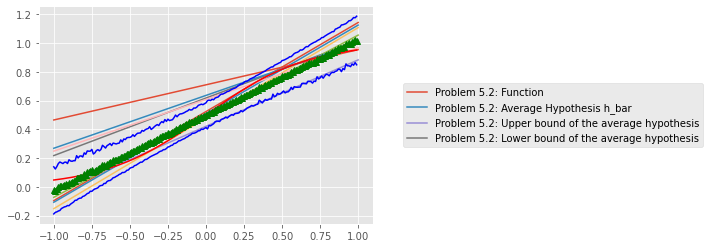

In [27]:
num_data_samples = 1000
num_x_samples = 1000    
print('------ Hypothesis set: h(x) = ax + b ------')
x=np.linspace(-1,1)
for i in range(1,10):
    x1=random.uniform(-1,1)
    x2=random.uniform(-1,1)
    f_x1 = np.exp(3*x1)/(1 + np.exp(3*x1))
    f_x2 = np.exp(3*x2)/(1 + np.exp(3*x2))
    a=(f_x2-f_x1)/(x2-x1)
    b=(x2*f_x1-x1*f_x2)/(x2-x1)
    h=a*x+b
    plt.plot(x,h)
    
calc_bias_var_eout(gd_funcb, lambda x: (np.exp(3*x))/(1 + np.exp(3*x)), 
                   num_data_samples, num_x_samples)


## 5.d

------ Hypothesis set: Y_X = f(X)+E------
The variance is:  0.014023964986757242
The bias is:  0.0017692786513712826
The expected out-of-sample error is:  0.015809007988979853
The E_D(variance+bias) is:  0.015793243638128524


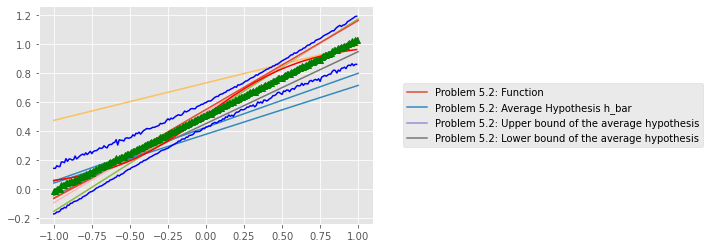

In [24]:
n= np.random.normal(0,0.004)
def gd_funcd(x, x1, x2):
    #hypothesis found by learning algorithm
    f_x1 = np.exp(3*x1)/(1 + np.exp(3*x1))
    f_x2 = np.exp(3*x2)/(1 + np.exp(3*x2))
    a=(f_x2-f_x1)/(x2-x1)
    b=(x2*f_x1-x1*f_x2)/(x2-x1)
    return a*x + b+n
print('------ Hypothesis set: Y_X = f(X)+E------')

x=np.linspace(-1,1)
for i in range(1,10):
    x1=random.uniform(-1,1)
    x2=random.uniform(-1,1)
    f_x1 = np.exp(3*x1)/(1 + np.exp(3*x1))+n
    f_x2 = np.exp(3*x2)/(1 + np.exp(3*x2))+n
    a=(f_x2-f_x1)/(x2-x1)
    b=(x2*f_x1-x1*f_x2)/(x2-x1)
    h=a*x+b+n
    plt.plot(x,h)
    
calc_bias_var_eout(gd_funcd, lambda x: (np.exp(3*x))/(1 + np.exp(3*x))+n, 
                   num_data_samples, num_x_samples) 

## 5e

------ Hypothesis set: Y_X = f(X)+E------
The variance is:  0.01365071710836155
The bias is:  0.011473739641505198
The expected out-of-sample error is:  0.025220781030797806
The E_D(variance+bias) is:  0.02512445674986675


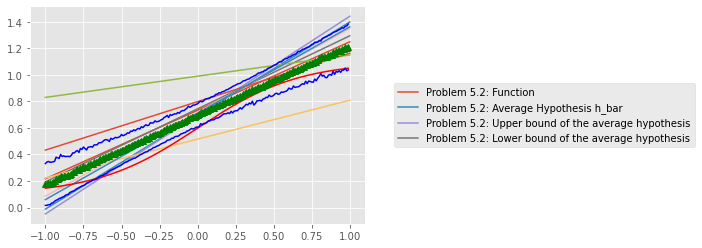

In [23]:
n1= np.random.normal(0.1,0.004)
def gd_funce(x, x1, x2):
    #hypothesis found by learning algorithm
    f_x1 = np.exp(3*x1)/(1 + np.exp(3*x1))+n1
    f_x2 = np.exp(3*x2)/(1 + np.exp(3*x2))+n1
    a=(f_x2-f_x1)/(x2-x1)
    b=(x2*f_x1-x1*f_x2)/(x2-x1)
    return a*x + b+n1
print('------ Hypothesis set: Y_X = f(X)+E------')

x=np.linspace(-1,1)
for i in range(1,10):
    x1=random.uniform(-1,1)
    x2=random.uniform(-1,1)
    f_x1 = np.exp(3*x1)/(1 + np.exp(3*x1))+n1
    f_x2 = np.exp(3*x2)/(1 + np.exp(3*x2))+n1
    a=(f_x2-f_x1)/(x2-x1)
    b=(x2*f_x1-x1*f_x2)/(x2-x1)
    h=a*x+b+n1
    plt.plot(x,h)
    
calc_bias_var_eout(gd_funce, lambda x: (np.exp(3*x))/(1 + np.exp(3*x))+n1, 
                   num_data_samples, num_x_samples) 